# Infrrd Assessment

Here, I will be looking at the stock market closing prices of Google over the course of 1 year, using data from the Yahoo Finance API.

In [230]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from datetime import date
import json
import http.client

# Connecting to Yahoo Finance API at the endpoint get_histories

In [200]:
conn = http.client.HTTPSConnection("apidojo-yahoo-finance-v1.p.rapidapi.com")
headers = {
    'x-rapidapi-key': "c9eaaa2d7amsh3a220ea12ae563bp19ff1bjsnfe40e890a0d7",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
}

Values sent in request:

Starting timestamp (From): 1576631905 -- 12/18/2019 at 1:18:25 AM GMT
Ending timestamp (To): 1608254305 -- 12/18/2020 at 1:18:25 AM GMT

Interval: 5 days ('1 week' was not a possible option for the interval value, so 5 days was the closest)

In [175]:
conn.request("GET", "/stock/get-histories?symbol=GOOGL%20&from=1576631905&to=1608254305&events=div&interval=5d&region=US", headers=headers)

In [176]:
res = conn.getresponse()
data = res.read()

In [216]:
data_str = data.decode("utf-8")
data_str_as_dictionary = json.loads(data_str)
timestamps = data_str_as_dictionary['chart']['result'][0]['timestamp']
actual_dates = [date.fromtimestamp(ts) for ts in timestamps]
closing_prices = data_str_as_dictionary['chart']['result'][0]['indicators']['quote'][0]['close']

From the data, I will be collecting the dates ("actual_dates") and the closing prices ("closing_prices") on each of those dates. The dictionary I create will have the date as the key with the respective closing price as the value.

# Initial Data View

In [201]:
date_with_price = {}
for i in range(len(actual_dates)):
    date_with_price[actual_dates[i]] = closing_prices[i]

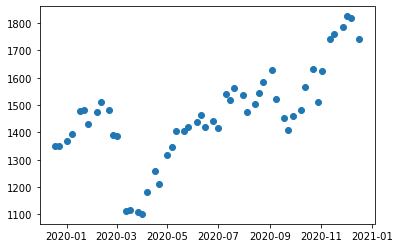

In [202]:
plt.scatter(date_with_price.keys(),date_with_price.values())

In [210]:
date_of_max = max(date_with_price, key=date_with_price.get)
max_price = date_with_price[date_of_max]
print("The max stock closing price was the week of " + str(date_of_max) + ", with value " + str(max_price))

date_of_min = min(date_with_price, key=date_with_price.get)
min_price = date_with_price[date_of_min]
print("The min stock closing price was the week of " + str(date_of_min) + ", with value " + str(min_price))

The max stock closing price was the week of 2020-12-02, with value 1824.969970703125
The min stock closing price was the week of 2020-04-01, with value 1102.0999755859375


Just from first glance, the closing prices generally seem to be generally increasing over time. This can be seen by the fact that stock prices have generally increased throughout the year, and because the max price was at the end of the year in December. Unexpectedly, the min price was not at the beginning of the year in January. This discrepancy will be covered in the section below. 

# Data filtering

There is one major dip in the graph above: between the months of February and June. This change happened because this is when the coronavirus pandemic first became widespread in the US. This is also the reason why the minimum stock closing price was in April, rather than at the beginning of the year in January. 

Since the coronavirus pandemic is an unprecedented incident (and hopefully there won't be any new pandemics in future years), it would be wise to remove the prices between February and June from our data, in case we want to use the data from 2020 to predict trends in future years. 

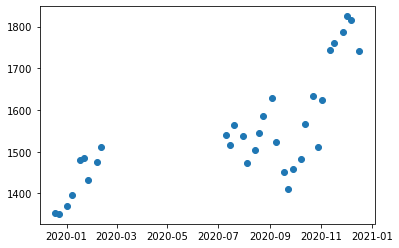

In [211]:
date_with_price_feb_to_june_removed = {}
start_date_remove = date(2020, 2, 11)
end_date_remove = date(2020, 7, 1)
for d in date_with_price:
    if d <= start_date_remove or d >= end_date_remove:
        date_with_price_feb_to_june_removed[d] = date_with_price[d]
plt.scatter(date_with_price_feb_to_june_removed.keys(),date_with_price_feb_to_june_removed.values())

To get rid of the gap in the middle of the graph:

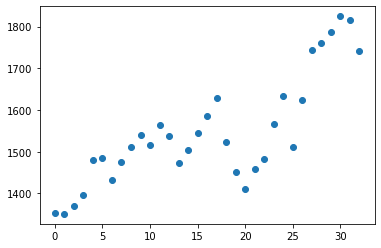

In [213]:
weeks_index = [i for i in range(len(date_with_price_feb_to_june_removed.keys()))]
plt.scatter(weeks_index,date_with_price_feb_to_june_removed.values())

In [214]:
date_of_max = max(date_with_price_feb_to_june_removed, key=date_with_price_feb_to_june_removed.get)
max_price = date_with_price_feb_to_june_removed[date_of_max]
print("The max stock closing price was the week of " + str(date_of_max) + ", with value " + str(max_price))

date_of_min = min(date_with_price_feb_to_june_removed, key=date_with_price_feb_to_june_removed.get)
min_price = date_with_price_feb_to_june_removed[date_of_min]
print("The min stock closing price was the week of " + str(date_of_min) + ", with value " + str(min_price))

The max stock closing price was the week of 2020-12-02, with value 1824.969970703125
The min stock closing price was the week of 2019-12-23, with value 1350.6300048828125


Now, the graph is much more indicative of the positive trend that will happen in other years when there is no coronavirus pandemic. As we see above, the max stock price was at the end of the year in December 2020, and the min stock price was at the end of last year in December 2019. Overall, this more clearly shows the trend of stock prices increasing over time. 

# Categorizing Data

<BarContainer object of 31 artists>

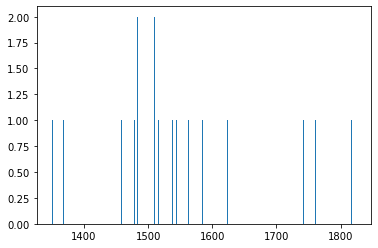

In [217]:
grouping_prices = {}
for price in date_with_price_feb_to_june_removed.values():
    price_rounded = int(price)
    if price_rounded in grouping_prices:
        grouping_prices[price_rounded] += 1
    else:
        grouping_prices[price_rounded] = 1
plt.bar(grouping_prices.keys(), grouping_prices.values())

All the possible stock prices have occurences of either 0, 1, or 2. To be quite honest, even though I was assigned to make the bar graph above, it isn't that interesting. This is primarily because the stock prices is quantitative data, while bar graphs are better for showing categorical data. 

One feature that instead would be more interesting to see is that, at a certain date, whether the stock price is increasing or decreasing. In other words, at a certain week has the stock price increased from the previous week or decreased from the previous week? This is a categorical feature, so this feature would be more appropriate for a bar graph. 

First, for all months: 

<BarContainer object of 3 artists>

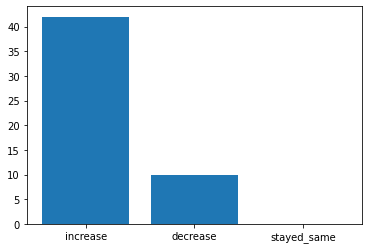

In [226]:
i_or_d = {"increase": 0, "decrease": 0, "stayed_same": 0}
previous_stock_price = list(date_with_price.values())[0]
first_date_removed = list(date_with_price.values())[1:]

for d in first_date_removed:
    if d < previous_stock_price:
        i_or_d["decrease"] += 1
    elif d > previous_stock_price:
        i_or_d["increase"] += 1
    else:
        i_or_d["stayed_same"] += 1
plt.bar(i_or_d.keys(), i_or_d.values())

Next, for the prices WITH February to June removed: 

<BarContainer object of 3 artists>

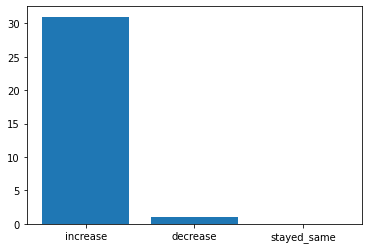

In [227]:
i_or_d = {"increase": 0, "decrease": 0, "stayed_same": 0}
previous_stock_price = list(date_with_price_feb_to_june_removed.values())[0]
first_date_removed = list(date_with_price_feb_to_june_removed.values())[1:]

for d in first_date_removed:
    if d < previous_stock_price:
        i_or_d["decrease"] += 1
    elif d > previous_stock_price:
        i_or_d["increase"] += 1
    else:
        i_or_d["stayed_same"] += 1
plt.bar(i_or_d.keys(), i_or_d.values())

In both graphs, you can see the stock price during any one certain week is more likely to have increased from the previous week. 

As you can see from the differences between the first and second graph, neglecting the effects that the pandemic had on the stock market between February and June (the second graph) results in an even greater chance of increasing prices. 

# Observations 

Overall, we can see that the stock market closing prices of Google increases as time progresses. Apart from the one dip between February and June (which happened due to the coronavirus pandemic), there is a positive trend between time and stock prices. As a result, it would be worth it to buy stocks now since the closing price for Google stocks will keep increasing throughout the future. In regards to other information needed to answer that question, I can train a machine learning model to better predict stock prices in the future. I will cover that in the section below.   

# Future Steps

As a software engineer, I am personally very interested in machine learning. As a result, I am really interested in seeing how this data from 2020 can be used to predict the stock prices for Google in future years. Since there seems to be a positive linear relationship between time and stock prices, I can train a linear regression model. 

In order to make the model more reliable, one strategy that I can use is data cleaning. I already did some feature above by removing the data between February and June. This is because the data during these months are affected by the start of the pandemic, and thus this trend is unlikely to be replicated in future years (hopefully).

Another strategy to make the model more reliable and accurate would be feature selection. So far, the only input feature I have used is time. Through further steps, I can use feature selection in order to find other factors and measure how much they impact the output value (the stock price). Through adding and selecting input features, I can make the model more accurate. 